In [124]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm import tqdm_notebook
import plotly.figure_factory as ff

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data=pd.read_csv(r'D:\SRM\WATER QUALITY\water_potability.csv')
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

# EDA

* ph-> pH of water
* Hardness-> Capacity of water to precipitate soap in mg/L
* Solids-> Total dissolved solids in ppm
* Chloramines-> Amount of Chloramines in ppm
* Sulfate-> Amount of Sulfates dissolved in mg/L
* Conductivity-> Electrical conductivity of water in μS/cm
* Organic_carbon-> Amount of organic carbon in ppm
* Trihalomethanes-> Amount of Trihalomethanes in μg/L
* Turbidity-> Measure of light emiting property of water in NTU (Nephelometric Turbidity Units)
* Potability-> Indicates if water is safe for human consumption

In [4]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
print('There are {} data points and {} features in the data'.format(data.shape[0],data.shape[1]))

There are 3276 data points and 10 features in the data


## Null Values

<Axes: >

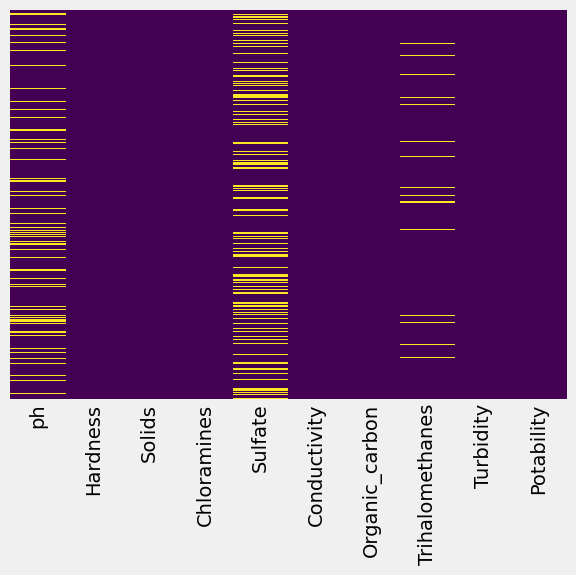

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        print("There are {} null values in {} column".format(data[i].isnull().sum(),i))

There are 491 null values in ph column
There are 781 null values in Sulfate column
There are 162 null values in Trihalomethanes column


## Handling Null Values

### PH

In [9]:
data['ph'].describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

Filling the missing values by mean

In [10]:
data['ph_mean']=data['ph'].fillna(data['ph'].mean())

In [11]:
data['ph_mean'].isnull().sum()

0

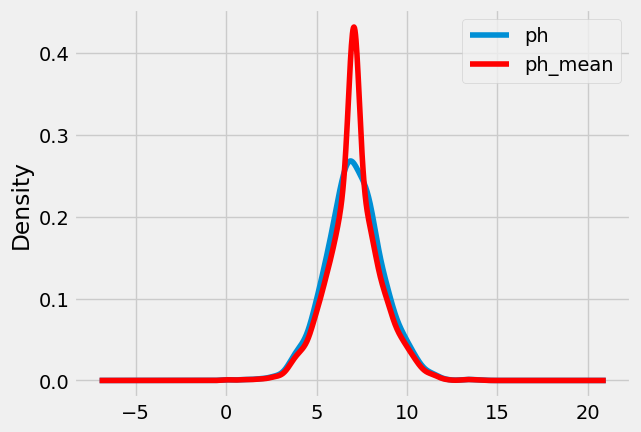

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['ph'].plot(kind='kde', ax=ax)
data.ph_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

#### The distribution is not uniform

Filling the data with random values

In [13]:
def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [14]:
impute_nan(data,"ph")

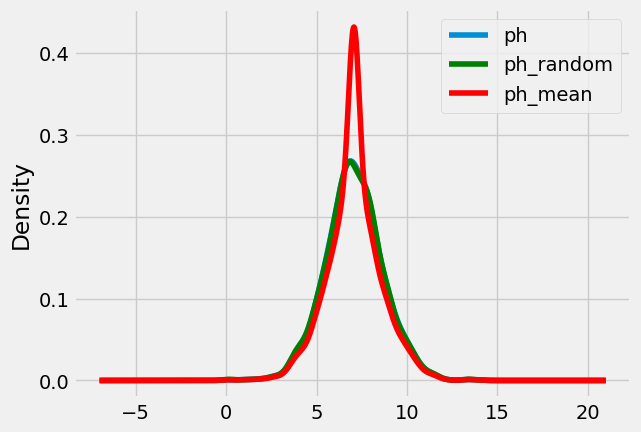

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['ph'].plot(kind='kde', ax=ax)
data.ph_random.plot(kind='kde', ax=ax, color='green')
data.ph_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

Uniform distribution with random initialization

In [16]:
impute_nan(data,"Sulfate")

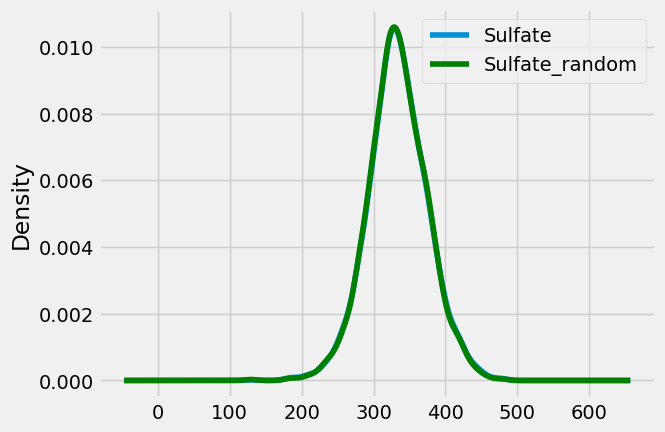

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Sulfate'].plot(kind='kde', ax=ax)
data["Sulfate_random"].plot(kind='kde', ax=ax, color='green')
#data.ph_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [18]:
impute_nan(data,"Trihalomethanes")

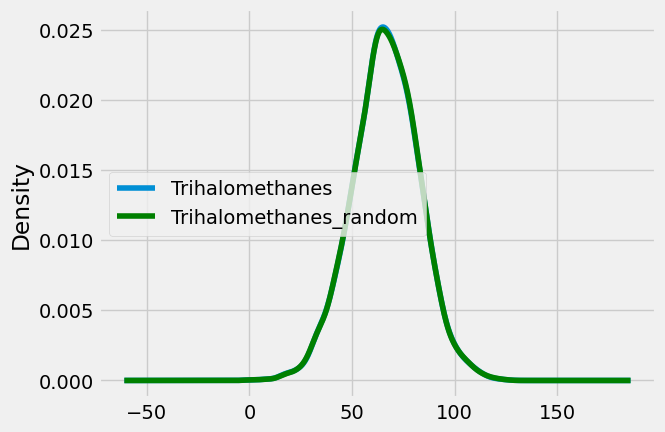

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Trihalomethanes'].plot(kind='kde', ax=ax)
data.Trihalomethanes_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [20]:
data=data.drop(['ph','Sulfate','Trihalomethanes','ph_mean'],axis=1)

In [21]:
data.isnull().sum()

Hardness                  0
Solids                    0
Chloramines               0
Conductivity              0
Organic_carbon            0
Turbidity                 0
Potability                0
ph_random                 0
Sulfate_random            0
Trihalomethanes_random    0
dtype: int64

## Check for Correlation

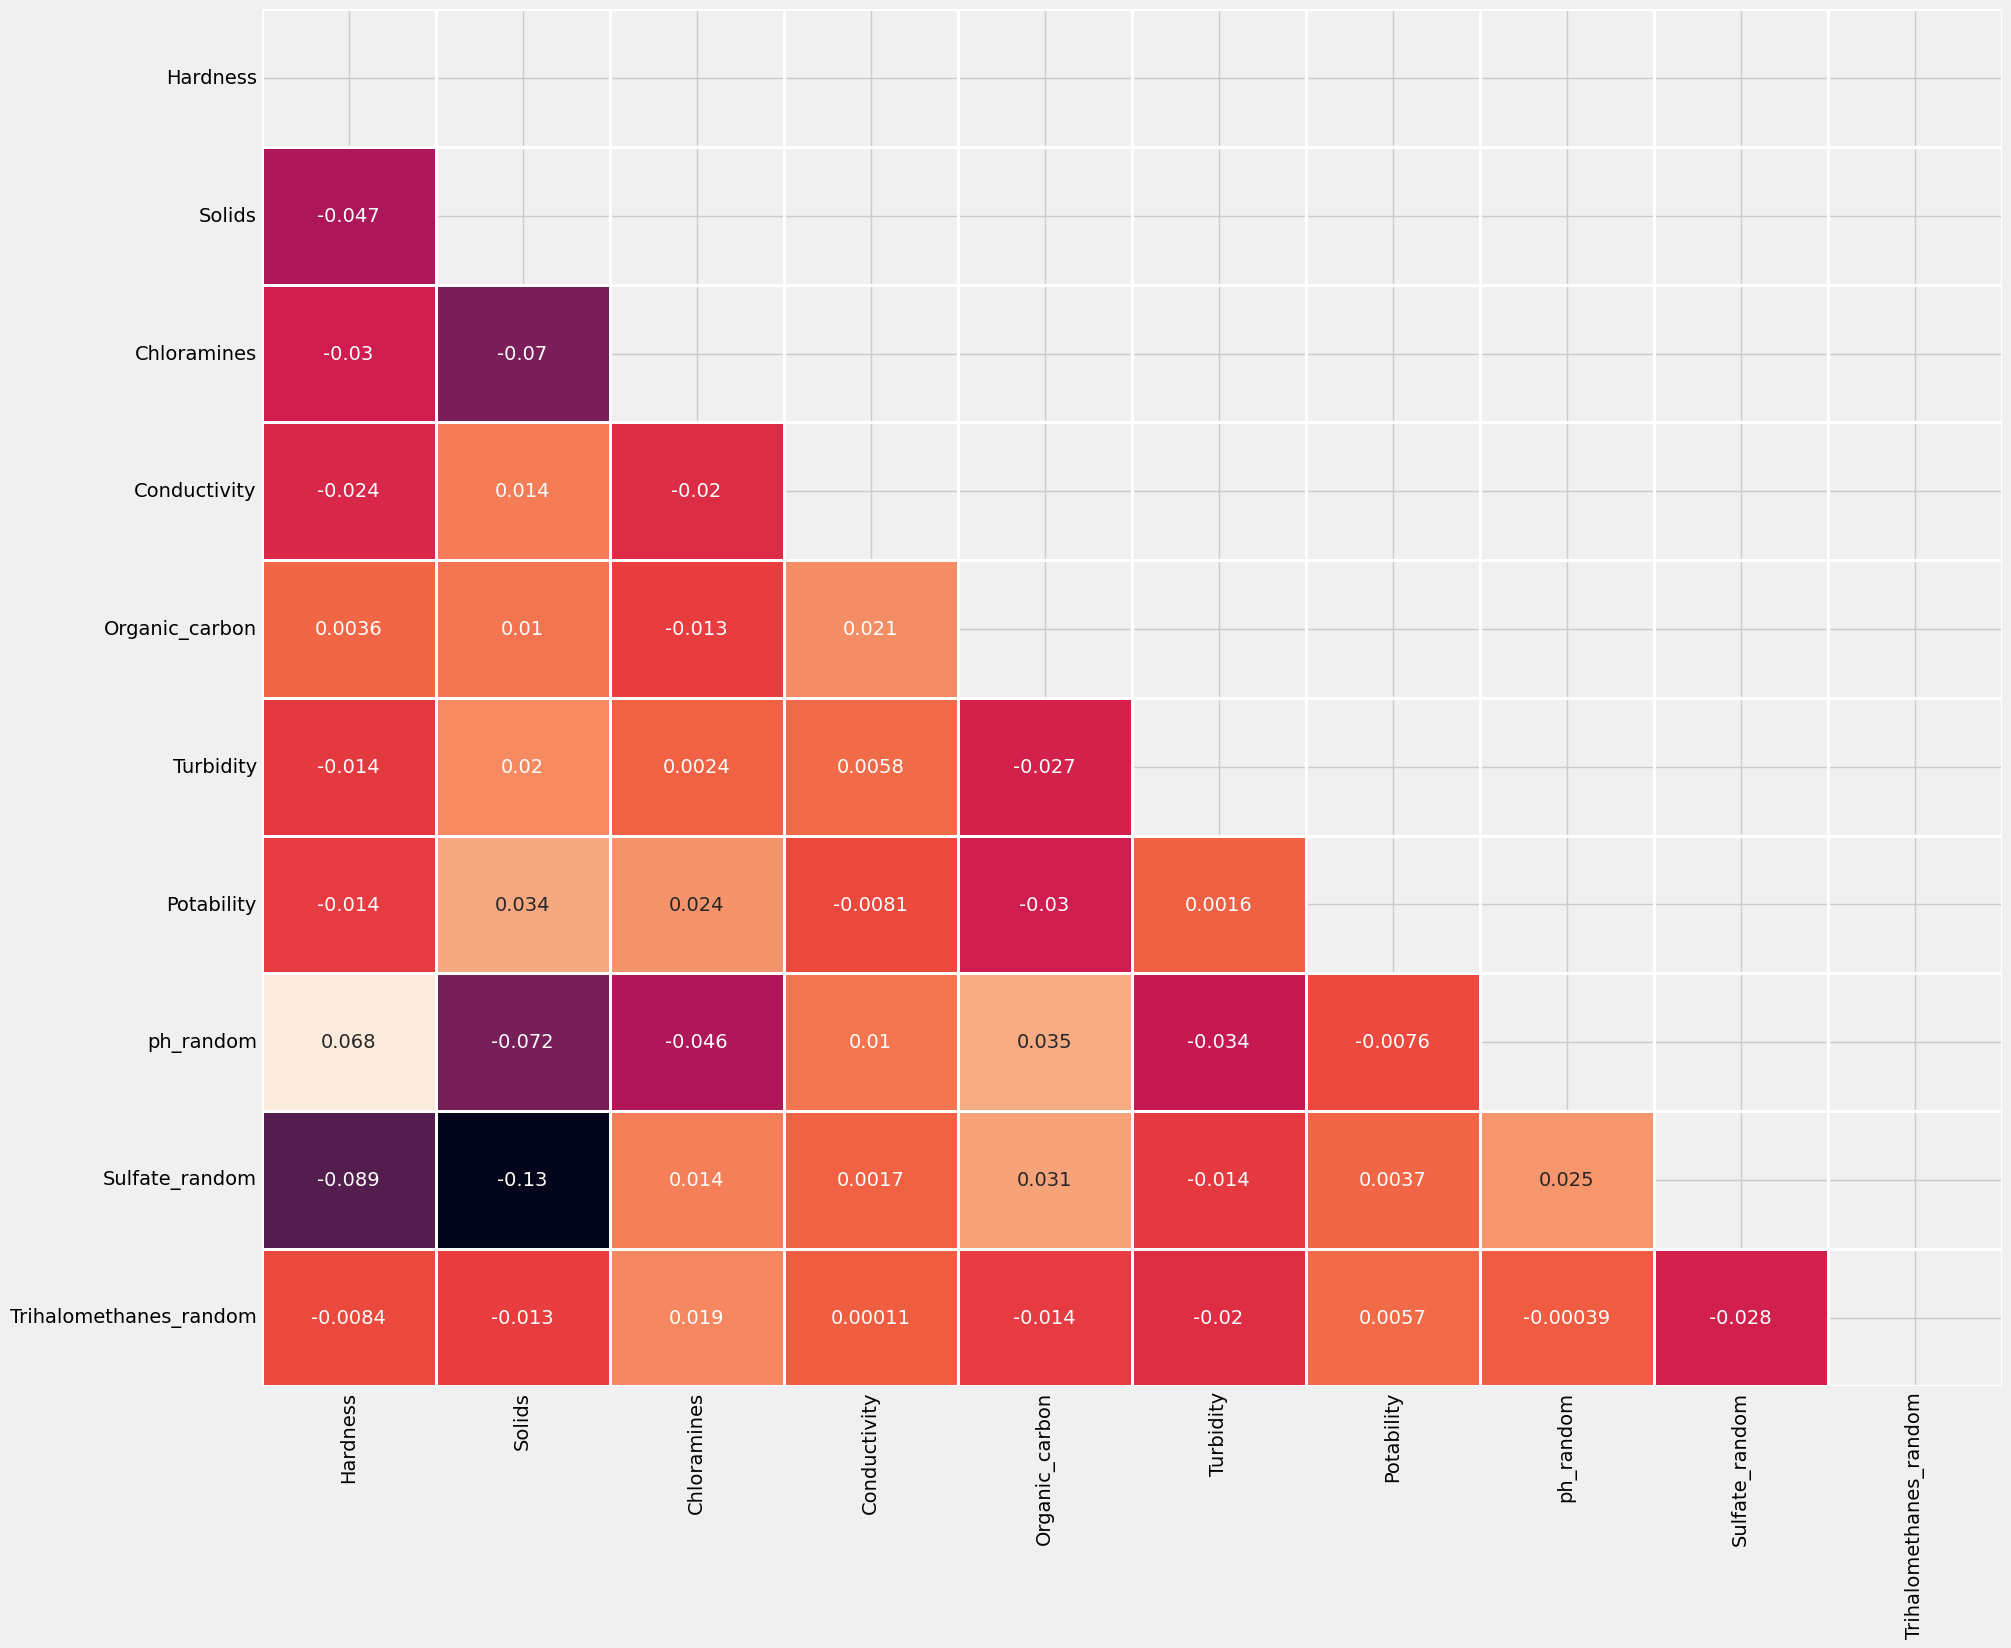

In [22]:
plt.figure(figsize=(20, 17))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket",cbar=False);

There are no correlated columns presebt in the data

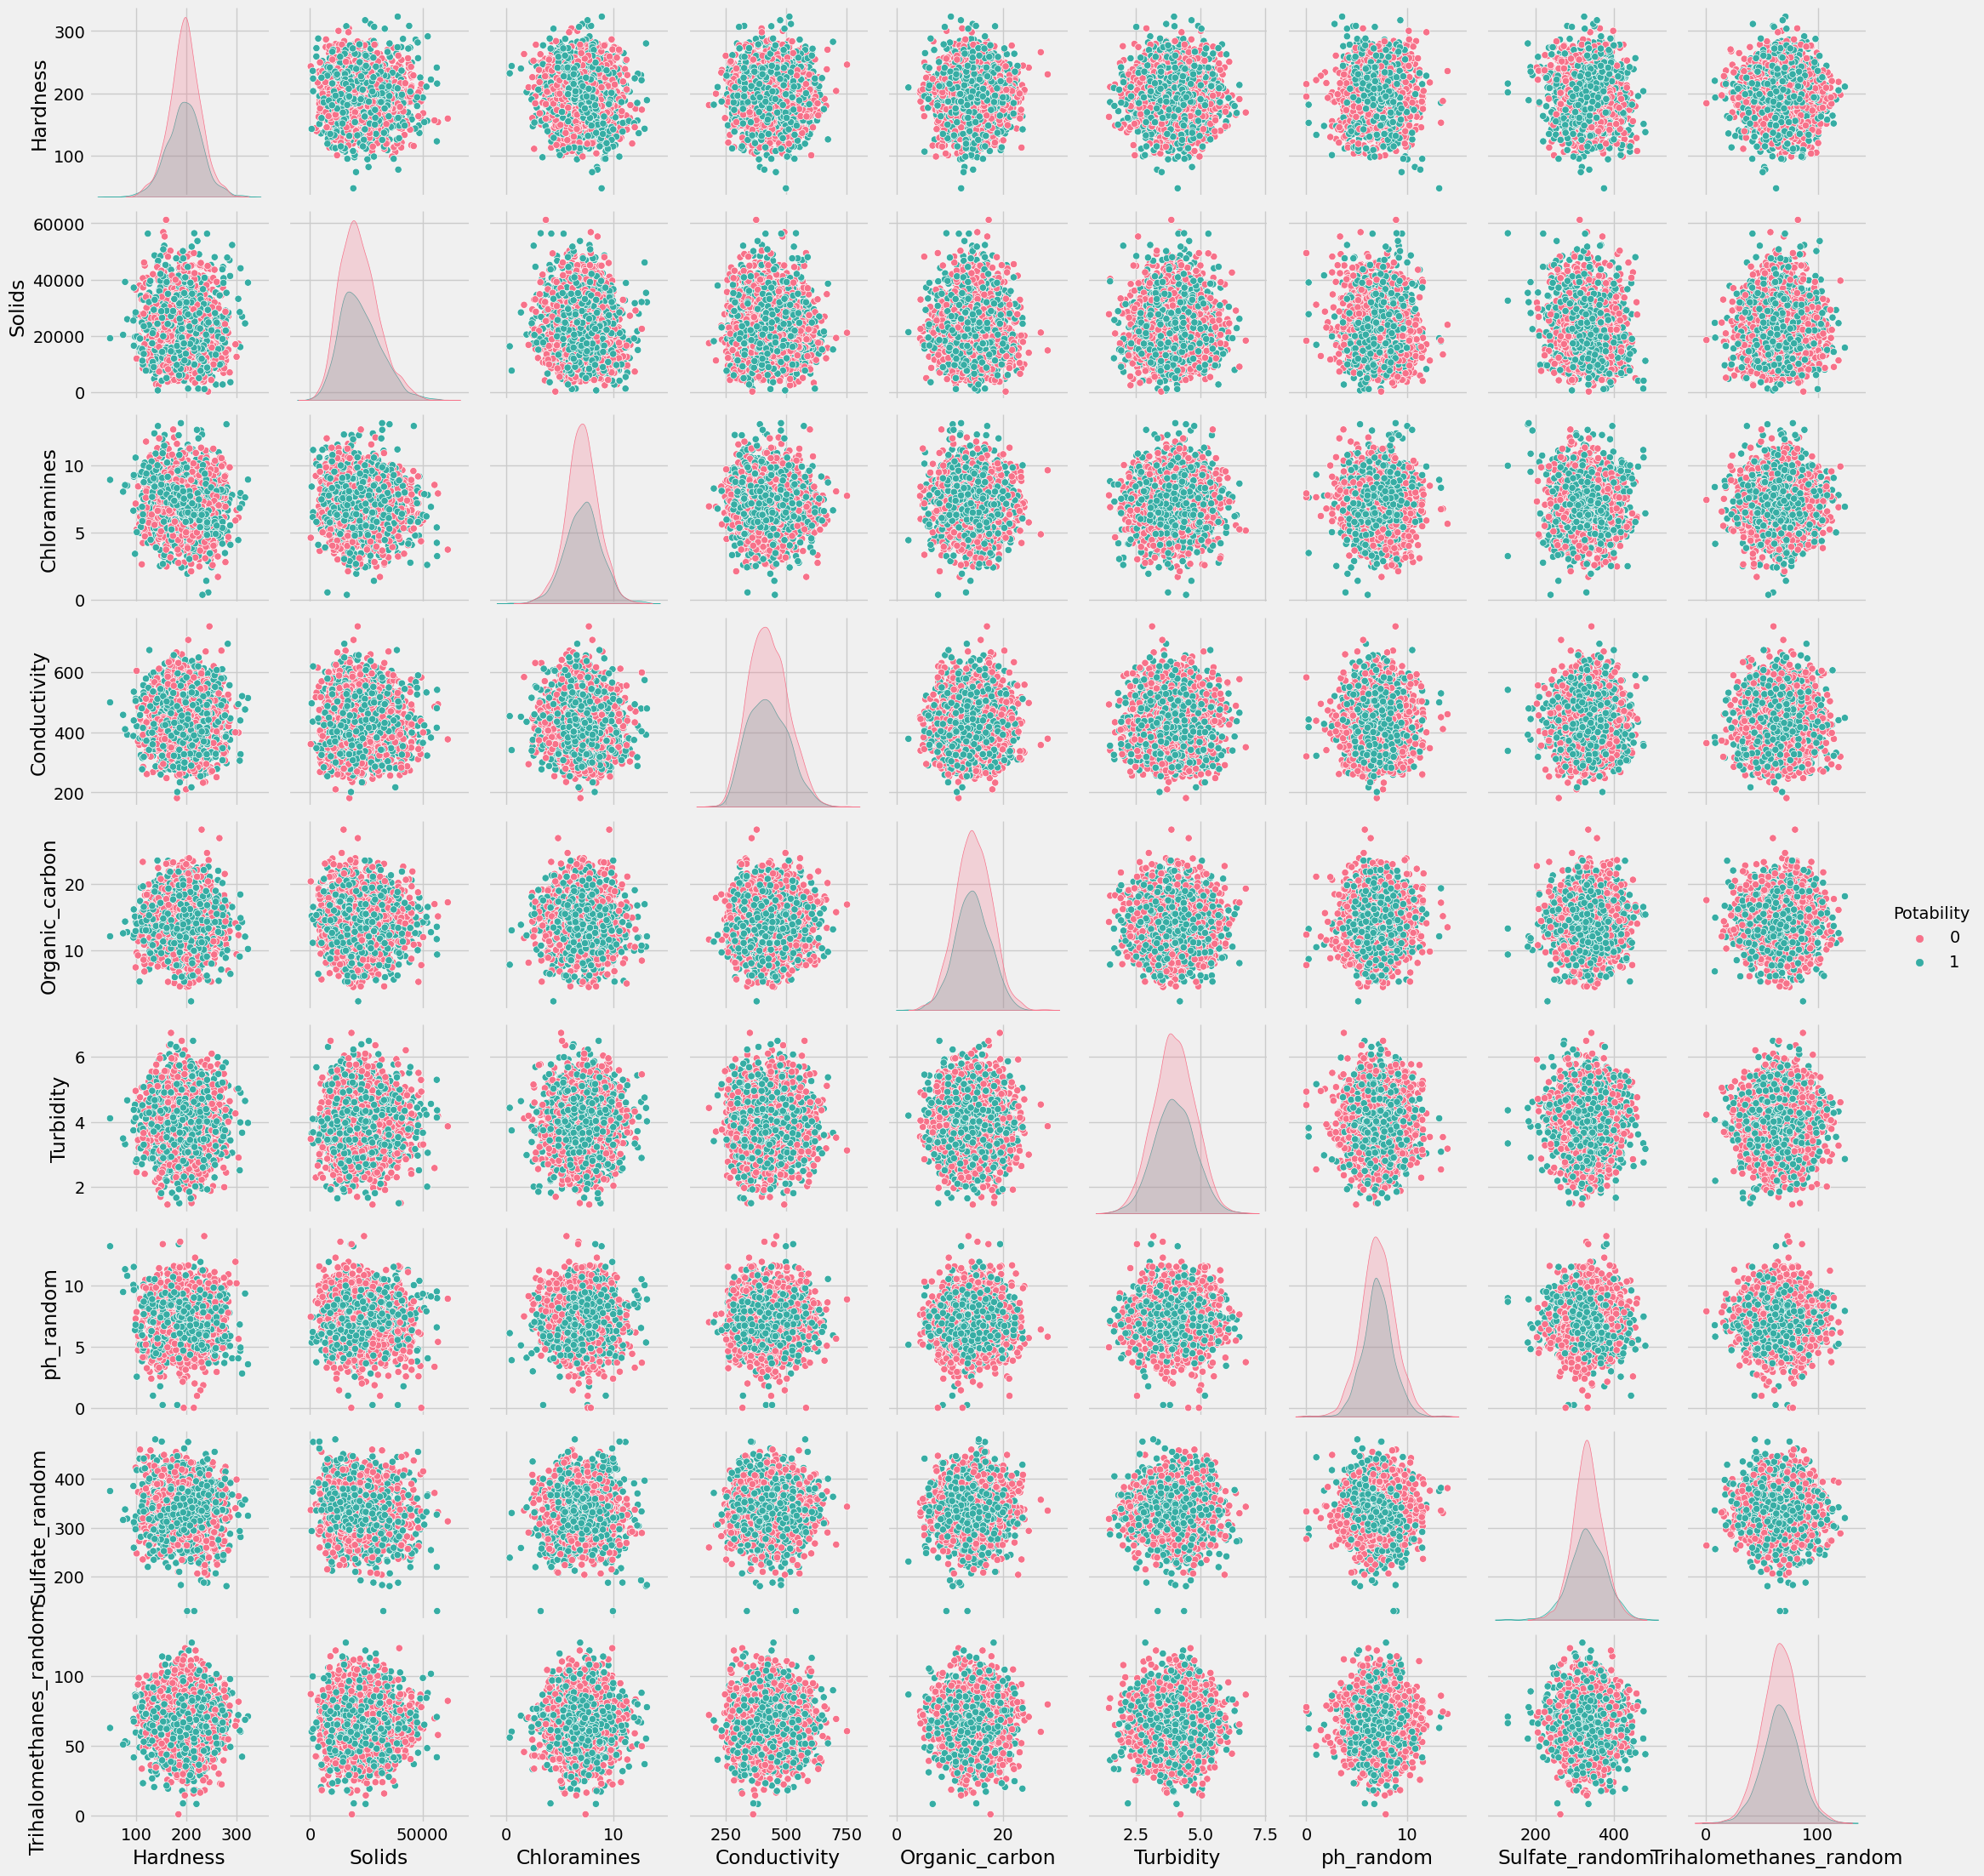

In [23]:
sns.pairplot(data, hue="Potability", palette="husl");

  0%|          | 0/9 [00:00<?, ?it/s]

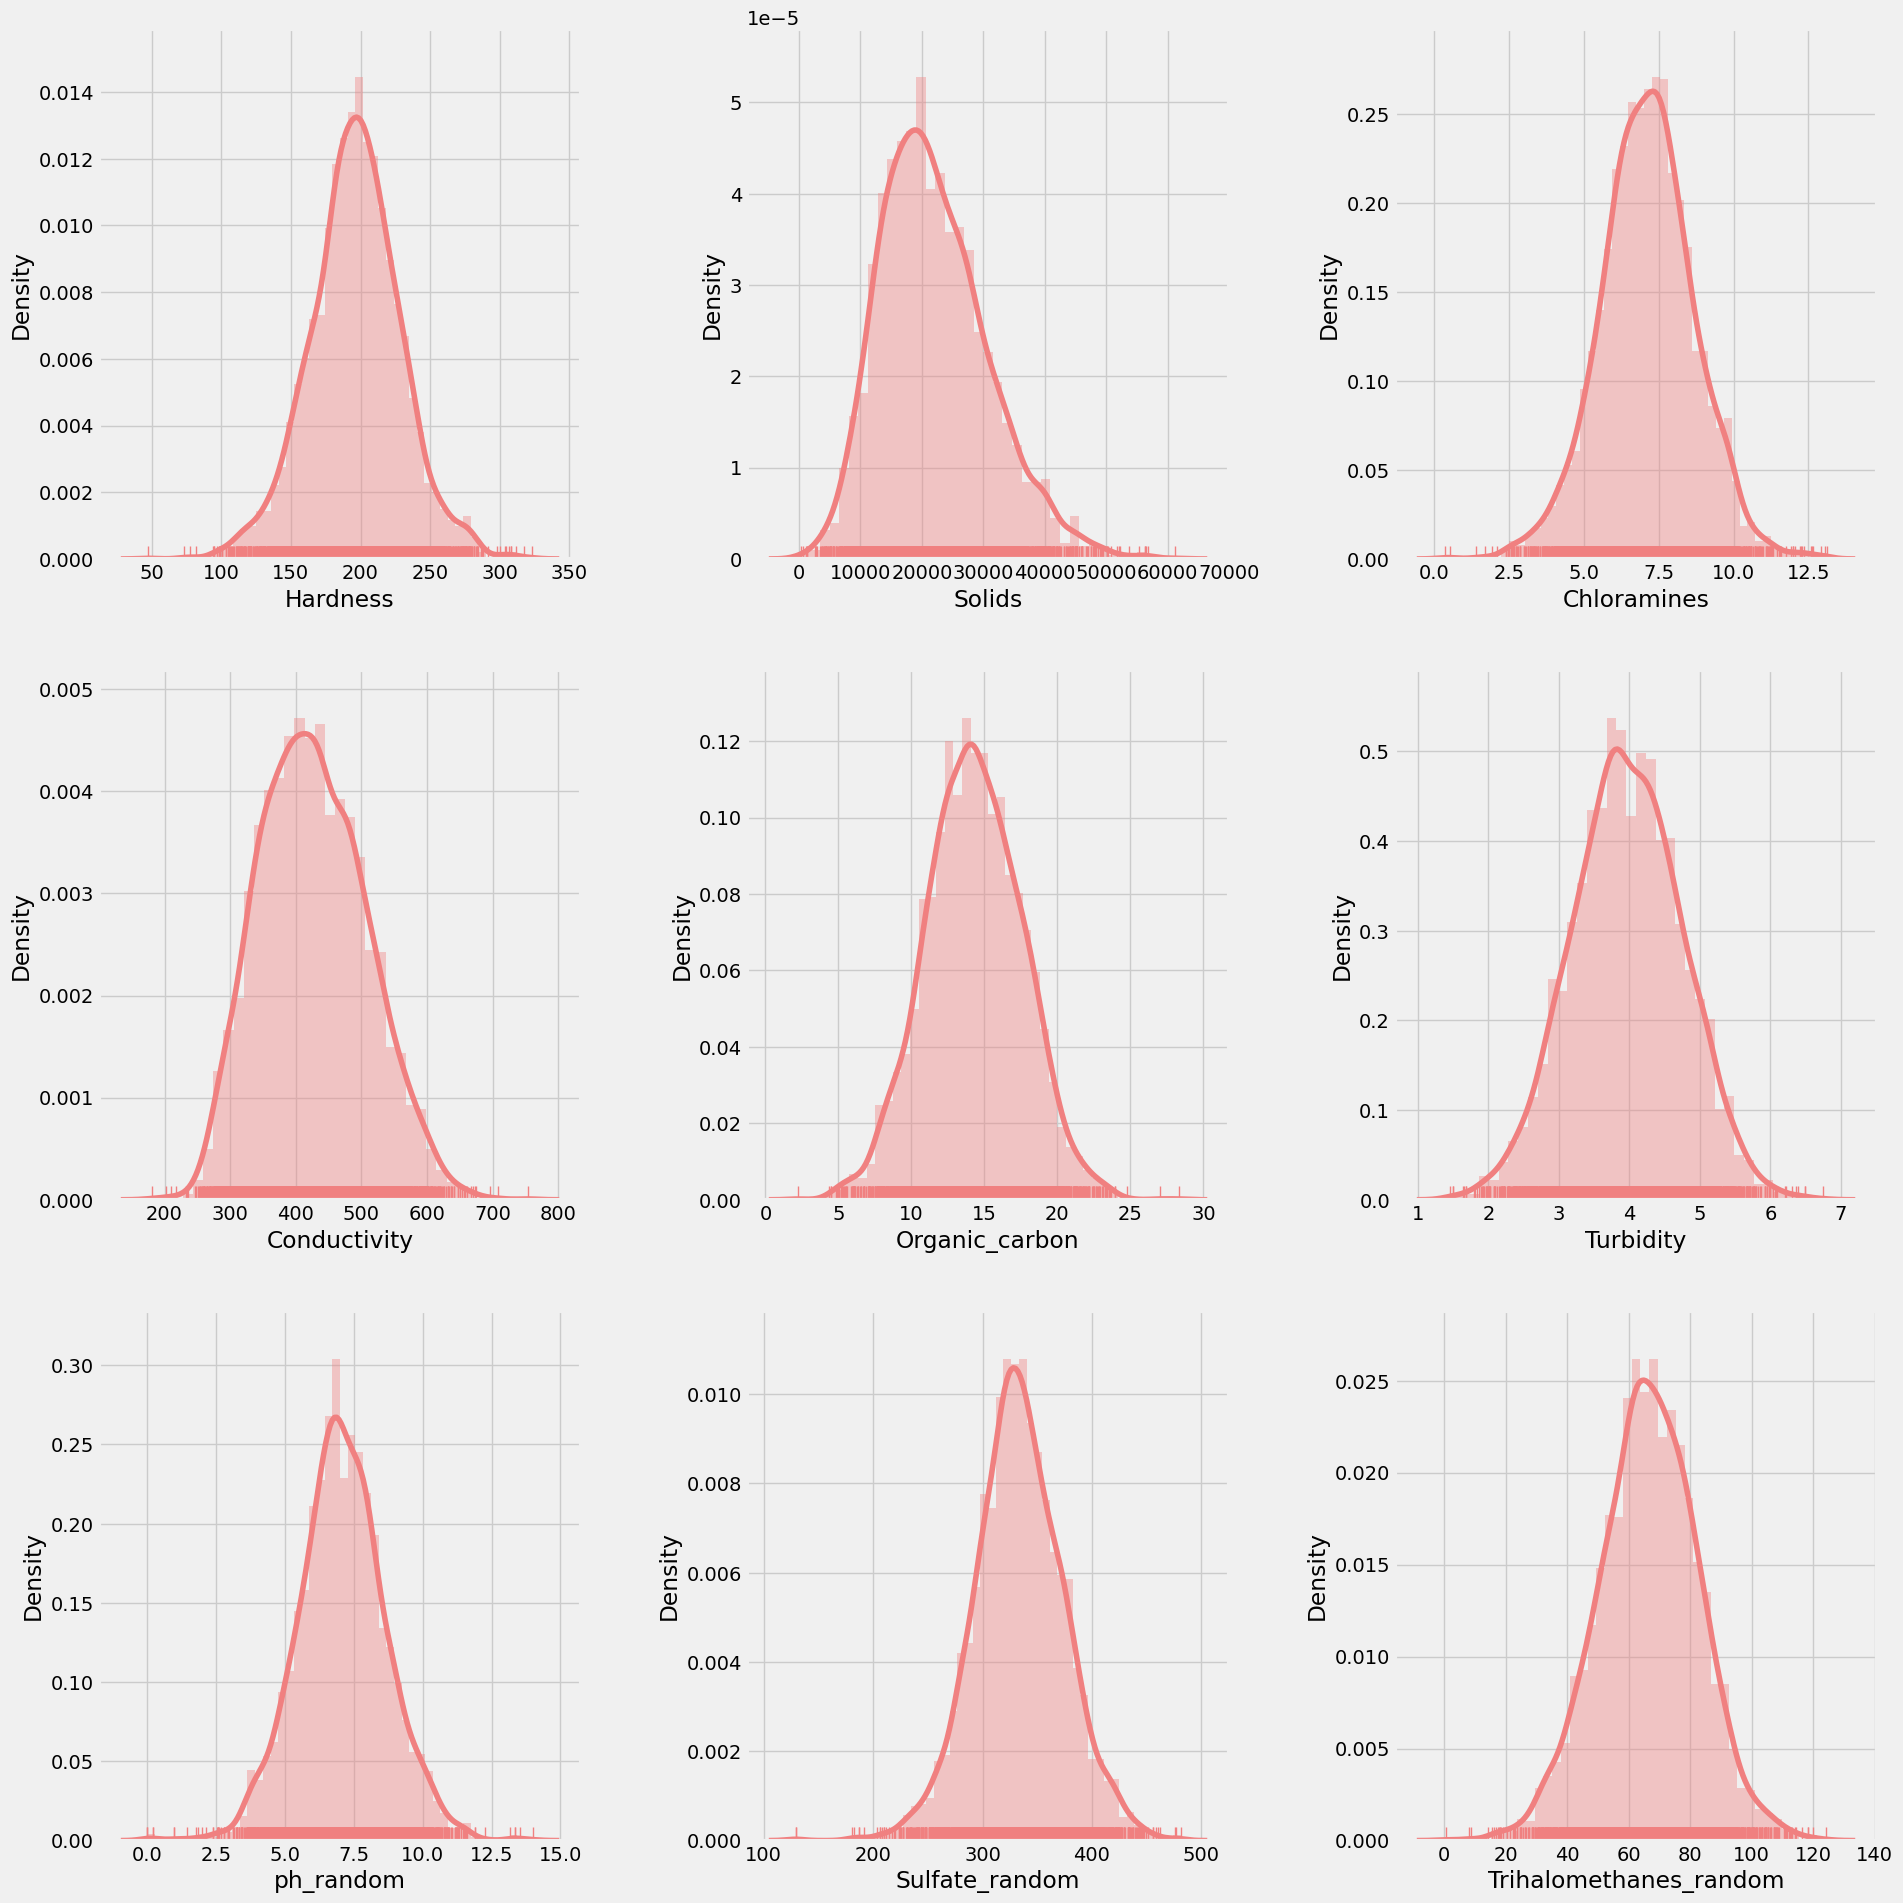

In [24]:
# !pip install --upgrade jupyter ipywidgets

def distributionPlot(data):
    """ 
    Creates distribution plot.
    """
    fig = plt.figure(figsize=(20, 20))
    for i in tqdm_notebook(range(0, len(data.columns))):
        fig.add_subplot(int(np.ceil(len(data.columns)/3)), 3, i+1)
        sns.distplot(
            data.iloc[:, i], color="lightcoral", rug=True)
        fig.tight_layout(pad=3.0)
plot_data = data.drop(['Potability'], axis =1)
distributionPlot(plot_data)

# Hardness

In [25]:
data['Hardness'].describe()

count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64

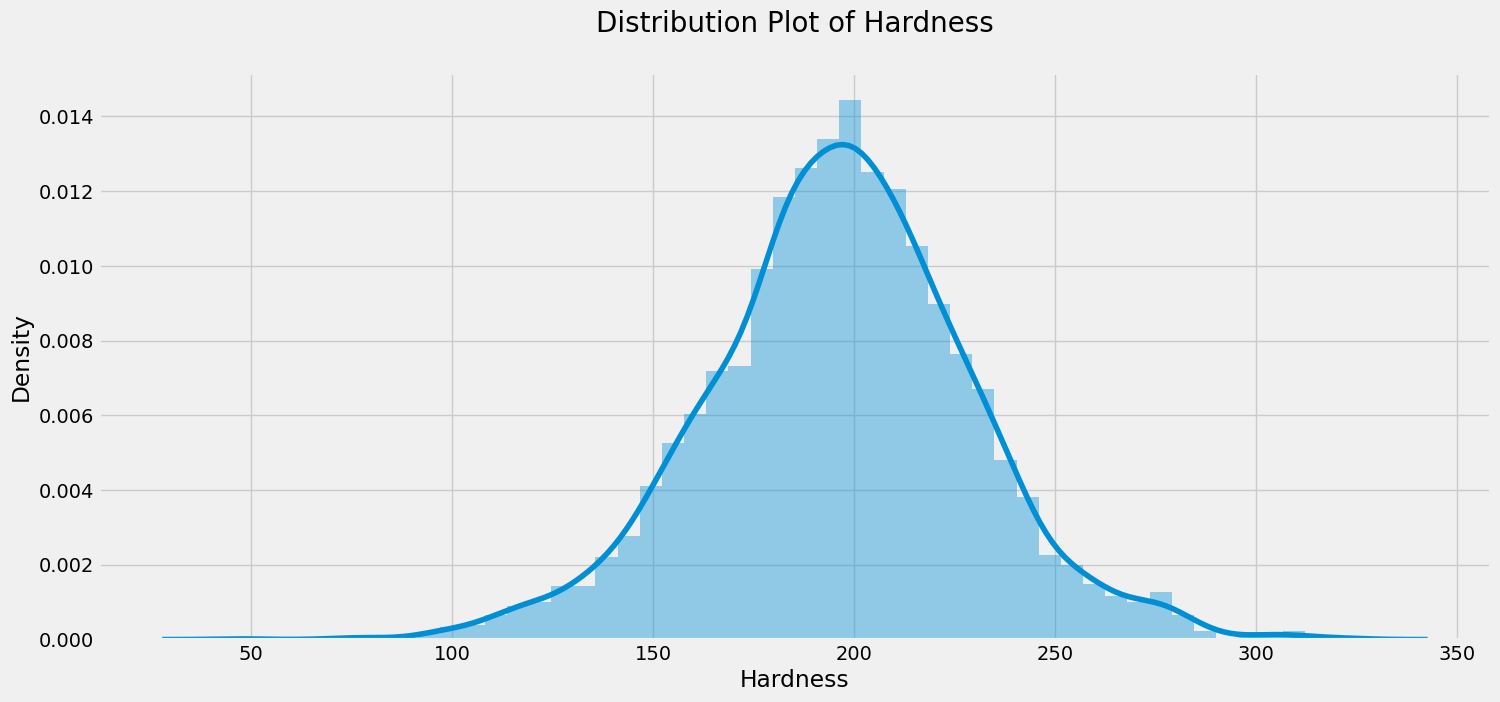

In [26]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Hardness'])
plt.title('Distribution Plot of Hardness\n', fontsize =  20)
plt.show()

In [27]:
# basic scatter plot
fig = px.scatter(data,range(data['Hardness'].count()), sorted(data['Hardness']),
                 color=data['Potability'],
                 labels={
                     'x': "Count",
                     'y': "Hardness",
                     'color':'Potability'
                     
                 }, template = 'plotly_dark')
fig.update_layout(title='Hardness wrt Potability')
fig.show()

In [28]:
px.histogram(data_frame = data, x = 'Hardness', nbins = 10, color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

# Solids

In [29]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

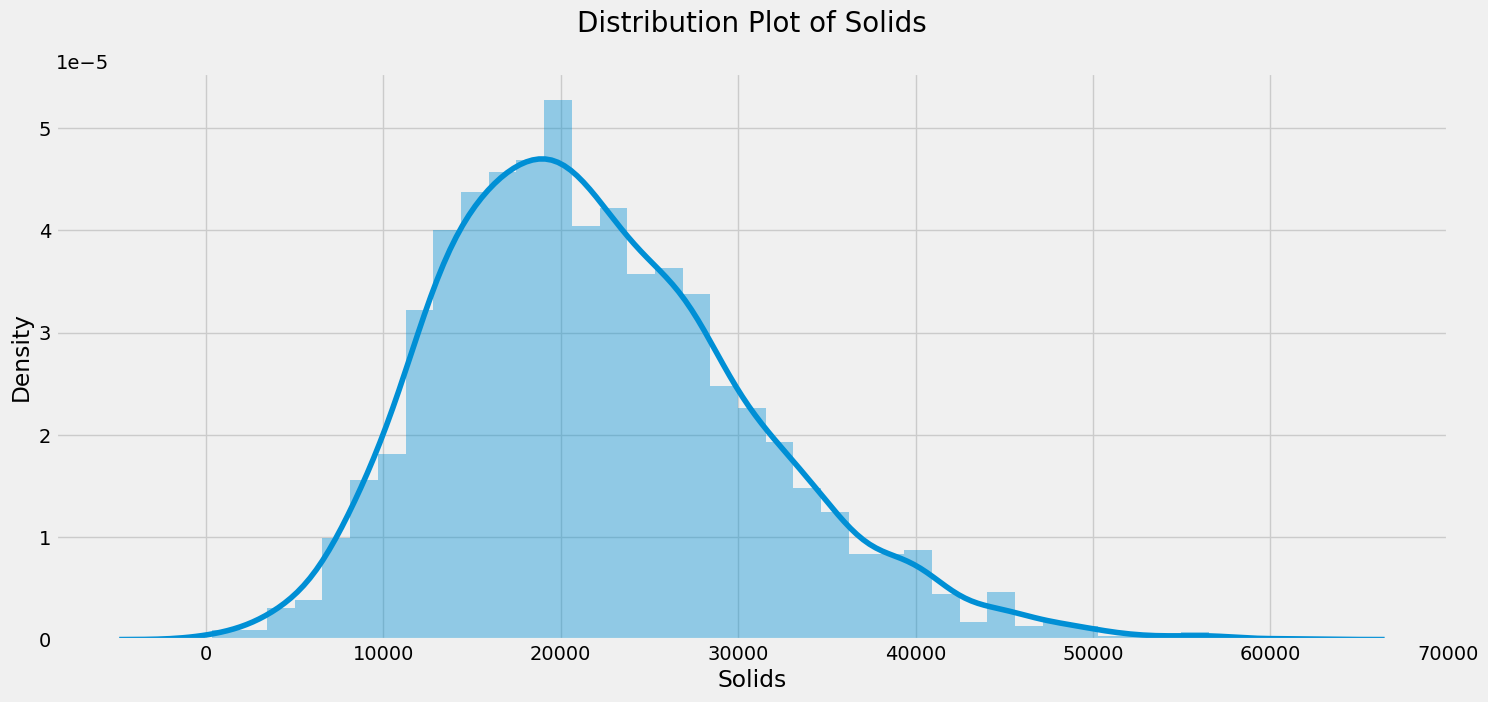

In [30]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Solids'])
plt.title('Distribution Plot of Solids\n', fontsize =  20)
plt.show()

In [31]:
fig = px.scatter(data, sorted(data["Solids"]), range(data["Solids"].count()), color="Potability", facet_col="Potability", 
                 facet_row="Potability")
fig.show()

In [32]:
px.histogram(data_frame = data, x = 'Solids', nbins = 10, color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

In [33]:
# basic scatter plot
fig = px.scatter(data,range(data['Solids'].count()), sorted(data['Solids']),
                 color=data['Potability'],
                 labels={
                     'x': "Count",
                     'y': "Hardness",
                     'color':'Potability'
                     
                 },
                 color_continuous_scale=px.colors.sequential.tempo,
                 template = 'plotly_dark')
fig.update_layout(title='Hardness wrt Potability')
fig.show()

# Chloramines

In [34]:
data['Chloramines'].describe()

count    3276.000000
mean        7.122277
std         1.583085
min         0.352000
25%         6.127421
50%         7.130299
75%         8.114887
max        13.127000
Name: Chloramines, dtype: float64

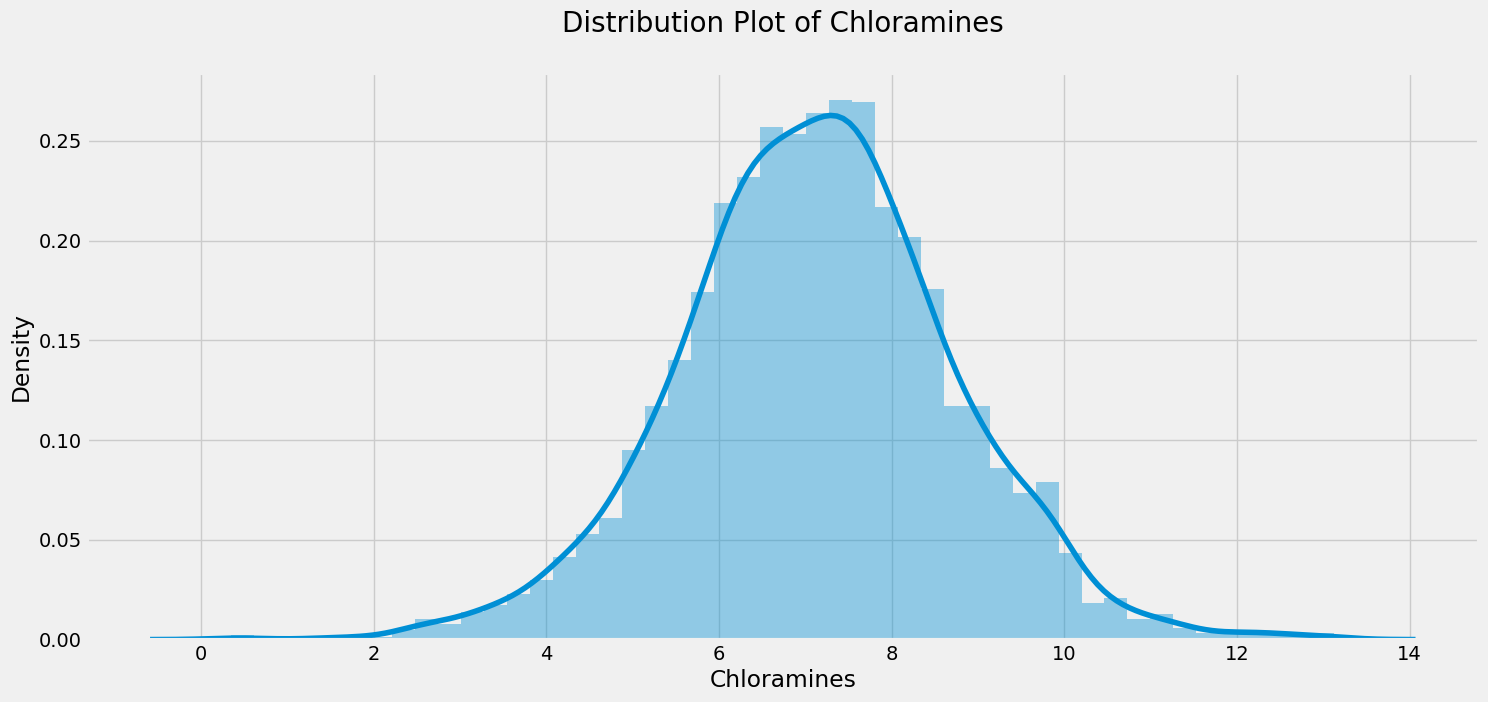

In [35]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Chloramines'])
plt.title('Distribution Plot of Chloramines\n', fontsize =  20)
plt.show()

In [36]:
fig = px.line(x=range(data['Chloramines'].count()), y=sorted(data['Chloramines']),color=data['Potability'], labels={
                     'x': "Count",
                     'y': "Chloramines",
                     'color':'Potability'
                     
                 }, template = 'plotly_dark')
fig.update_layout(title='Chloramines wrt Potability')
fig.show()

In [37]:
fig = px.box(x = 'Chloramines', data_frame = data, template = 'plotly_dark')
fig.update_layout(title='Chloramines')
fig.show()

# Conductivity

In [38]:
data["Conductivity"].describe()

count    3276.000000
mean      426.205111
std        80.824064
min       181.483754
25%       365.734414
50%       421.884968
75%       481.792304
max       753.342620
Name: Conductivity, dtype: float64

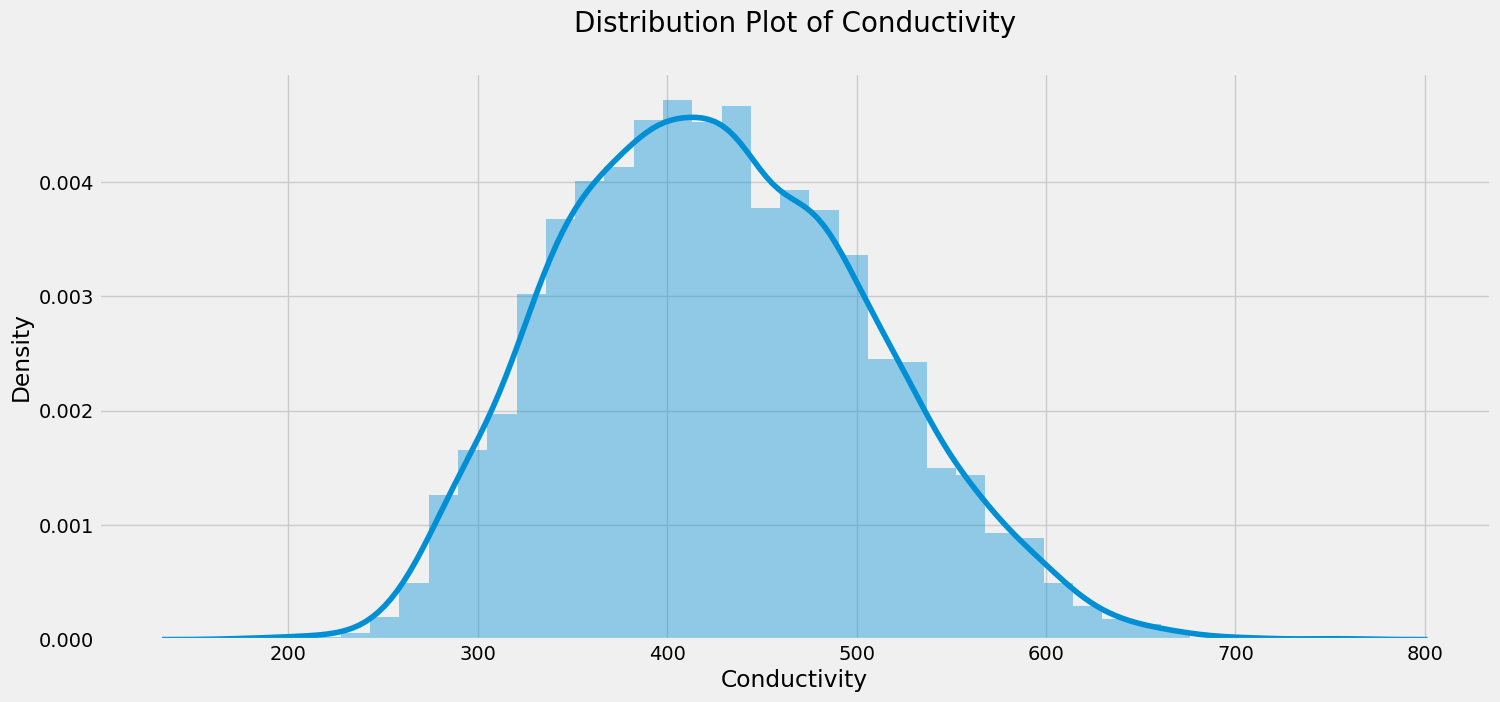

In [39]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Conductivity'])
plt.title('Distribution Plot of Conductivity\n', fontsize =  20)
plt.show()

In [40]:
fig = px.bar(data, x=range(data['Conductivity'].count()),
             y=sorted(data['Conductivity']), labels={
                     'x': "Count",
                     'y': "Conductivity",
                     'color':'Potability'
                     
                 },
             color=data['Potability']
             ,template = 'plotly_dark')
fig.update_layout(title='Conductivity wrt Potability')
fig.show() 

In [41]:

group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot([data['Conductivity']], group_labels)
fig.show()

# Organic_carbon

In [42]:
data['Organic_carbon'].describe()

count    3276.000000
mean       14.284970
std         3.308162
min         2.200000
25%        12.065801
50%        14.218338
75%        16.557652
max        28.300000
Name: Organic_carbon, dtype: float64

In [43]:

group_labels = ['Organic_carbon'] # name of the dataset

fig = ff.create_distplot([data['Organic_carbon']], group_labels)
fig.show()

In [44]:
dt_5=data[data['Organic_carbon']<5]
dt_5_10=data[(data['Organic_carbon']>5)&(data['Organic_carbon']<10)]
dt_10_15=data[(data['Organic_carbon']>10)&(data['Organic_carbon']<15)]
dt_15_20=data[(data['Organic_carbon']>15)&(data['Organic_carbon']<20)]
dt_20_25=data[(data['Organic_carbon']>20)&(data['Organic_carbon']<25)]
dt_25=data[(data['Organic_carbon']>25)]

x_Age = ['5', '5-10', '10-15', '15-20', '25+']
y_Age = [len(dt_5.values), len(dt_5_10.values), len(dt_10_15.values), len(dt_15_20.values),
     len(dt_25.values)]

px.bar(data_frame = data, x = x_Age, y = y_Age, color = x_Age, template = 'plotly_dark',
       title = 'Number of passengers per Age group')

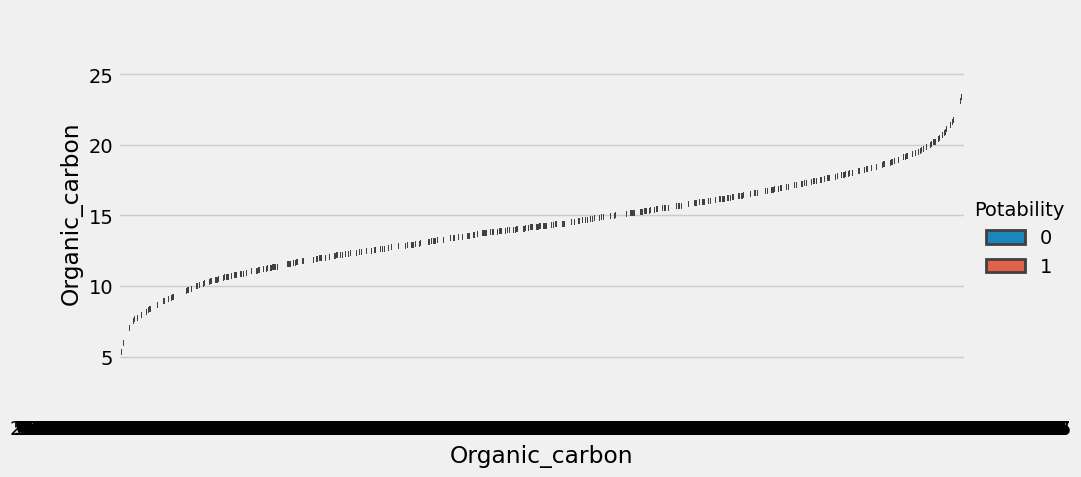

In [45]:
sns.catplot(x = 'Organic_carbon', y = 'Organic_carbon', hue = 'Potability', data = data, kind = 'box',
            height = 5, aspect = 2)
plt.show()

# Turbidity

In [46]:
data['Turbidity'].describe()

count    3276.000000
mean        3.966786
std         0.780382
min         1.450000
25%         3.439711
50%         3.955028
75%         4.500320
max         6.739000
Name: Turbidity, dtype: float64

In [47]:

group_labels = ['Turbidity'] # name of the dataset

fig = ff.create_distplot([data['Turbidity']], group_labels)
fig.show()

In [48]:
data['turbid_class']=data['Turbidity'].astype(int)

In [49]:
data['turbid_class'].unique()

array([2, 4, 3, 5, 6, 1])

In [50]:
px.scatter(data_frame = data, x = 'Turbidity', y = 'turbid_class', color = 'Potability', template = 'plotly_dark')

In [51]:
# fig = px.pie(data,
#              values=data['turbid_class'].value_counts(), 
#              names=data['turbid_class'].value_counts().keys(),
#             )
# fig.update_layout(
#     title='turbid_class',
#     template = 'plotly_dark'
# )
# fig.show()


import plotly.express as px

# Calculate value counts
turbid_class_counts = data['turbid_class'].value_counts()

fig = px.pie(
    values=turbid_class_counts.values,
    names=turbid_class_counts.index,
    title='turbid_class'
)

fig.update_layout(template='plotly_dark')
fig.show()


In [52]:
data=data.drop(['turbid_class'],axis=1)

# ph_random

In [53]:
data['ph_random'].describe()

count    3276.000000
mean        7.071639
std         1.607991
min         0.000000
25%         6.081460
50%         7.029490
75%         8.063147
max        14.000000
Name: ph_random, dtype: float64

In [54]:

group_labels = ['ph_random'] # name of the dataset

fig = ff.create_distplot([data['ph_random']], group_labels)
fig.show()

In [55]:
px.histogram(data_frame = data, x = 'ph_random', nbins = 10, color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

In [56]:
fig = px.scatter(data, sorted(data["ph_random"]), range(data["ph_random"].count()), color="Potability", facet_col="Potability", 
                 facet_row="Potability")
fig.show()

# Sulfate_random

In [57]:
data['Sulfate_random'].describe()

count    3276.000000
mean      333.430954
std        41.026947
min       129.000000
25%       307.523159
50%       332.879578
75%       359.710517
max       481.030642
Name: Sulfate_random, dtype: float64

In [58]:
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot([data['Sulfate_random']], group_labels)
fig.show()

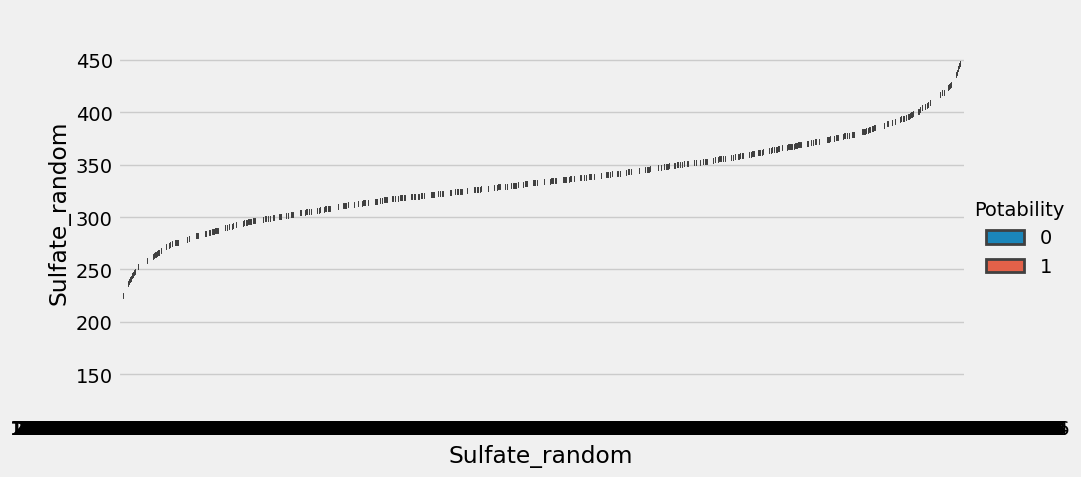

In [59]:
sns.catplot(x = 'Sulfate_random', y = 'Sulfate_random', hue = 'Potability', data = data, kind = 'box',
            height = 5, aspect = 2)
plt.show()

# Trihalomethanes_random

In [60]:
data['Trihalomethanes_random'].describe()

count    3276.000000
mean       66.419200
std        16.184832
min         0.738000
25%        55.861675
50%        66.639068
75%        77.384166
max       124.000000
Name: Trihalomethanes_random, dtype: float64

In [61]:

group_labels = ['Trihalomethanes_random'] # name of the dataset

fig = ff.create_distplot([data['Trihalomethanes_random']], group_labels)
fig.show()

In [62]:
fig = px.box(x = 'Trihalomethanes_random', data_frame = data, template = 'plotly_dark')
fig.update_layout(title='Trihalomethanes_random')
fig.show()

In [63]:
fig = px.line(x=range(data['Trihalomethanes_random'].count()), y=sorted(data['Trihalomethanes_random']),color=data['Potability'], labels={
                     'x': "Count",
                     'y': "Trihalomethanes",
                     'color':'Potability'
                     
                 }, template = 'plotly_dark')
fig.update_layout(title='Trihalomethane wrt Potability')
fig.show()

# Potability

In [64]:
data['Potability'].describe()

count    3276.000000
mean        0.390110
std         0.487849
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Potability, dtype: float64

In [65]:
px.histogram(data_frame = data, x = 'Potability', color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

In [66]:
# fig = px.pie(data,
#              values=data['Potability'].value_counts(), 
#              names=data['Potability'].value_counts().keys(),
#             )
# fig.update_layout(
#     title='Potability',
#     template = 'plotly_dark'
# )
# fig.show()

import plotly.express as px

# Calculate value counts
potability_counts = data['Potability'].value_counts()

fig = px.pie(
    values=potability_counts.values,
    names=potability_counts.index,
    title='Potability'
)

fig.update_layout(template='plotly_dark')
fig.show()





# Data Preprocessing

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [68]:
X=data.drop(['Potability'],axis=1)
y=data['Potability']

Since the data is not in a uniform shape, we scale the data using standard scalar

In [69]:
scaler = StandardScaler()
x=scaler.fit_transform(X)

In [70]:
# split the data to train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.85,random_state=42)


print("training data shape:-{} labels{} ".format(x_train.shape,y_train.shape))
print("testing data shape:-{} labels{} ".format(x_test.shape,y_test.shape))

training data shape:-(2784, 9) labels(2784,) 
testing data shape:-(492, 9) labels(492,) 


# Modeling

### Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0).fit(x_train, y_train)
log.score(x_test, y_test)


0.6219512195121951

Accuracy: 0.6219512195121951
Precision: 0.0
F1 Score: 0.0


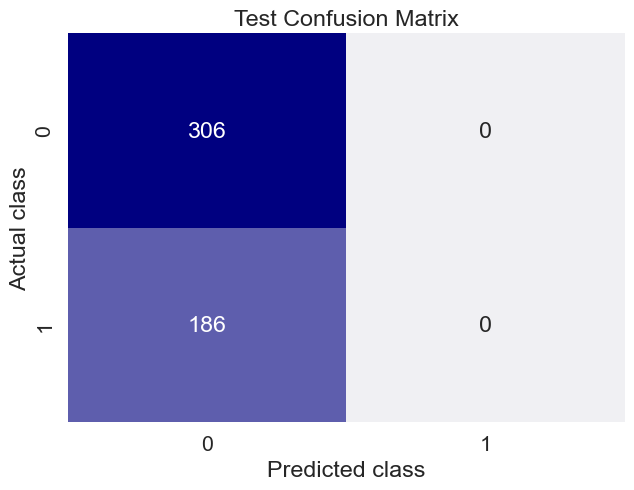

In [108]:
# Make Predictions
pred1 = log.predict(np.array(x_test))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, pred1)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred1)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, pred1)
print("Precision:", precision)

# Calculate F1 score
f1 = f1_score(y_test, pred1)
print("F1 Score:", f1)

# Set a blue color palette
blue_palette = sns.light_palette("navy", as_cmap=True)

# Make Predictions
pred1 = log.predict(np.array(x_test))

# Plot Confusion Matrix

plt.title("Confusion Matrix (Testing Data)")
sns.heatmap(confusion_matrix(y_test, pred1), annot=True, cmap=blue_palette, cbar=False, fmt='g')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test.png')
plt.show()

### K Nearest Neighbours

Accuracy: 0.62
Precision: 0.49
F1-score: 0.32


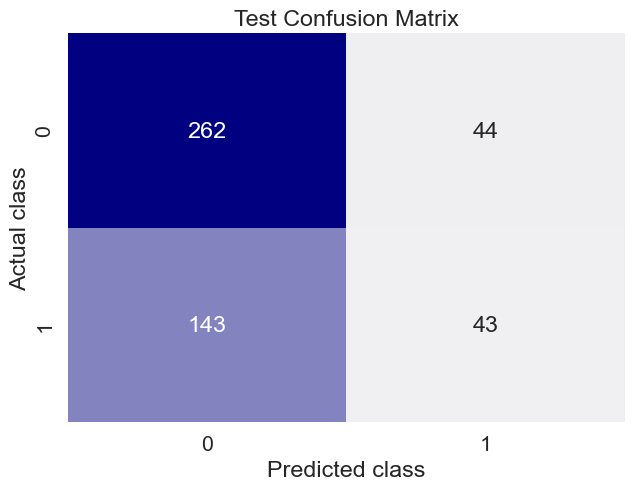

In [107]:

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

# Predict using the trained model on the test data
predicted = knn.predict(x_test)

# Calculate accuracy, precision, and F1-score
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
f1 = f1_score(y_test, predicted)

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('F1-score: {:.2f}'.format(f1))

# Create the confusion matrix using the test data
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predicted)

# Set a blue color palette
blue_palette = sns.light_palette("navy", as_cmap=True)

# Plot the confusion matrix with a blue theme

sns.set(font_scale=1.4)  # for label size
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=predicted), annot=True, cmap=blue_palette, cbar=False, fmt='g')

plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test_blue.png')
plt.show()



### SVM

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.6808943089430894
Precision: 0.6705882352941176
F1 Score: 0.4206642066420664


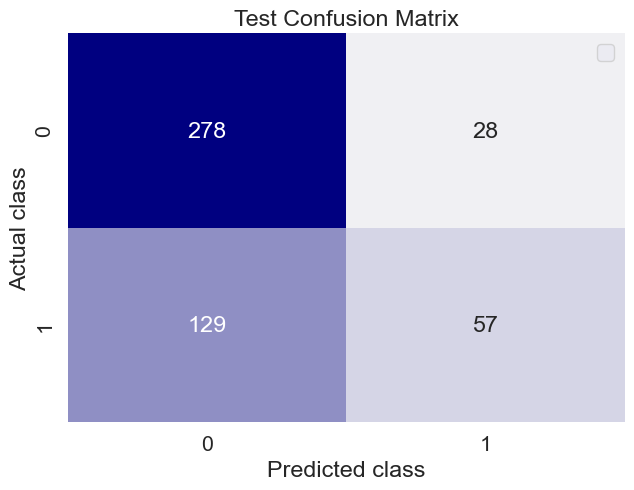

In [106]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svmc = svm.SVC()
svmc.fit(x_train, y_train)

y_pred = svmc.predict(x_test)

# Make Predictions
pred1 = svmc.predict(np.array(x_test))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, pred1)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred1)

# Calculate precision
precision = precision_score(y_test, pred1)

# Calculate F1 score
f1 = f1_score(y_test, pred1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

# Make Predictions
pred1=svmc.predict(np.array(x_test))
plt.title("Confusion Matrix (Testing data)")

sns.heatmap(confusion_matrix(y_test,pred1),annot=True, cmap=blue_palette, cbar=False, fmt='g')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test_blue.png')
plt.legend()
plt.show()

### Decision Tree

In [ ]:
# from sklearn import tree
# from sklearn.metrics import accuracy_score

Accuracy: 0.56
Precision: 0.42
F1-score: 0.42


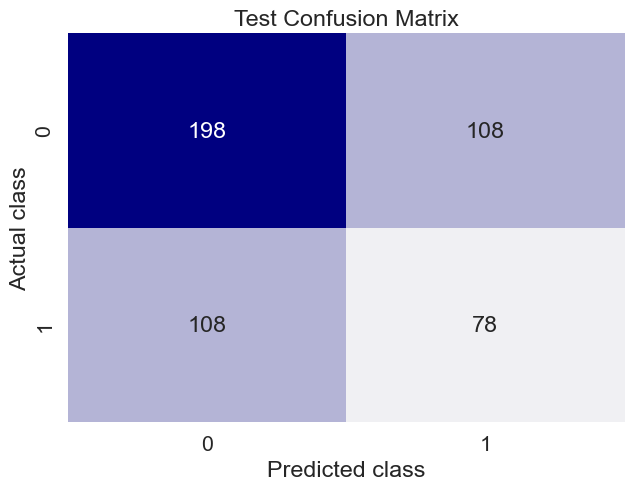

In [104]:
# tre = tree.DecisionTreeClassifier()
# tre = tre.fit(x_train, y_train)

# y_pred = tre.predict(x_test)
# print(accuracy_score(y_test,y_pred))

from sklearn import tree
tre = tree.DecisionTreeClassifier()
tre = tre.fit(x_train, y_train)
y_pred = tre.predict(x_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# Calculate precision
precision = precision_score(y_test, y_pred)
print('Precision: {:.2f}'.format(precision))

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print('F1-score: {:.2f}'.format(f1))

# Make Predictions
pred1=tre.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True, cmap=blue_palette, cbar=False, fmt='g')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test_blue.png')
plt.show()

### Random Forest

Accuracy: 0.68
Precision: 0.63
F1 score: 0.46


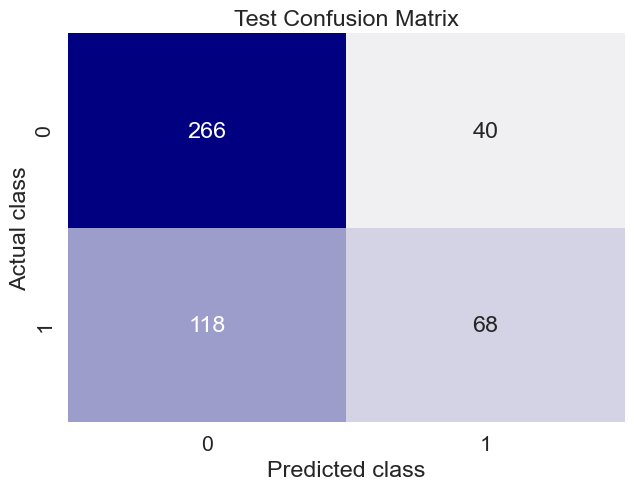

In [111]:
# # create the model
# model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=100)


# # fitting the model
# model_rf=model_rf.fit(x_train, y_train) 

# y_pred = model_rf.predict(x_test)
# print(accuracy_score(y_test,y_pred))

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Create the model
model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=100)

# Fitting the model
model_rf = model_rf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_rf.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print('Precision: {:.2f}'.format(precision))

# Calculate and print F1 score
f1 = f1_score(y_test, y_pred)
print('F1 score: {:.2f}'.format(f1))

# Make Predictions
pred1=model_rf.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True, cmap=blue_palette, cbar=False, fmt='g')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test_blue.png')
plt.show()


### XG Boost

In [113]:
from xgboost import XGBClassifier
from sklearn.metrics import r2_score

xgb = XGBClassifier(colsample_bylevel= 0.9,
                    colsample_bytree = 0.8, 
                    gamma=0.99,
                    max_depth= 5,
                    min_child_weight= 1,
                    n_estimators= 8,
                    nthread= 5,
                    random_state= 0,
                    )
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.99, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=8, n_jobs=None, nthread=5, num_parallel_tree=None,
              predictor=None, ...)

In [114]:
# from sklearn.metrics import accuracy_score,precision_score,f1_score

# print('Accuracy of XGBoost classifier on training set: {:.2f}'
#      .format(xgb.score(x_train, y_train)))
# print('Accuracy of XGBoost classifier on test set: {:.2f}'
#      .format(xgb.score(x_test, y_test)))


Accuracy: 0.65
Precision: 0.57
F1 score: 0.30


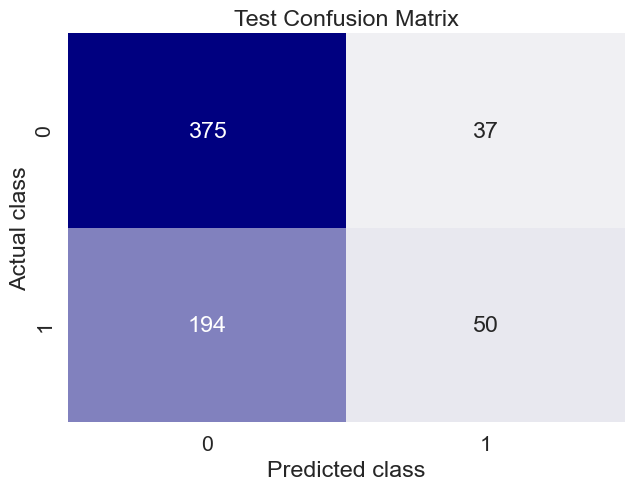

In [120]:



# Assuming you have a DataFrame 'data' with features and 'Potability' as the target variable
# Replace 'data' with your actual dataset

# Separate features (X) and target variable (y)
X = data.drop(['Potability'], axis=1)
y = data['Potability']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the XGBoost classifier
xgb = XGBClassifier(colsample_bylevel=0.9,
                    colsample_bytree=0.8,
                    gamma=0.99,
                    max_depth=5,
                    min_child_weight=1,
                    n_estimators=8,
                    nthread=5,
                    random_state=0)

# Fit the classifier to the training data
xgb.fit(x_train, y_train)

# Predictions on the test set
y_pred = xgb.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print('Precision: {:.2f}'.format(precision))

# Calculate and print F1 score
f1 = f1_score(y_test, y_pred)
print('F1 score: {:.2f}'.format(f1))

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_matrix, annot=True, cmap=blue_palette, cbar=False, fmt='g')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test_blue.png')
plt.show()

### NAIVE BAYES

Accuracy: 0.95
Precision: 0.83
F1 score: 0.91


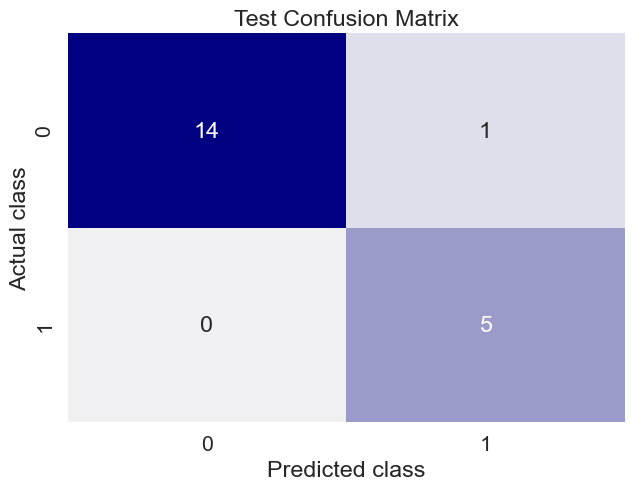

In [122]:


# Generate some example data
X = np.random.rand(100, 2)  # Features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1:.2f}")

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_matrix, annot=True, cmap=blue_palette, cbar=False, fmt='g') # font size
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test.png')
plt.show()

### DNN

In [127]:

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,f1_score
from tensorflow.keras.models import Sequential

# Load or generate your dataset
# X: Features, y: Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.1)

# Predict using the trained model
y_pred = model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)



Epoch 1/500
3/3 [==============================] - 1s 80ms/step - loss: 0.6977 - accuracy: 0.4444 - val_loss: 0.6845 - val_accuracy: 0.7500
Epoch 2/500
3/3 [==============================] - 0s 17ms/step - loss: 0.6400 - accuracy: 0.7778 - val_loss: 0.6115 - val_accuracy: 0.7500
Epoch 3/500
3/3 [==============================] - 0s 20ms/step - loss: 0.5900 - accuracy: 0.8472 - val_loss: 0.5502 - val_accuracy: 0.7500
Epoch 4/500
3/3 [==============================] - 0s 21ms/step - loss: 0.5476 - accuracy: 0.9028 - val_loss: 0.4989 - val_accuracy: 0.8750
Epoch 5/500
3/3 [==============================] - 0s 29ms/step - loss: 0.5075 - accuracy: 0.9444 - val_loss: 0.4527 - val_accuracy: 0.8750
Epoch 6/500
3/3 [==============================] - 0s 23ms/step - loss: 0.4707 - accuracy: 0.9583 - val_loss: 0.4139 - val_accuracy: 0.8750
Epoch 7/500
3/3 [==============================] - 0s 23ms/step - loss: 0.4372 - accuracy: 0.9583 - val_loss: 0.3765 - val_accuracy: 1.0000
Epoch 8/500
3/3 [===

Accuracy: 0.95
Precision: 0.83
F1 Score: 0.91
Recall 1.00


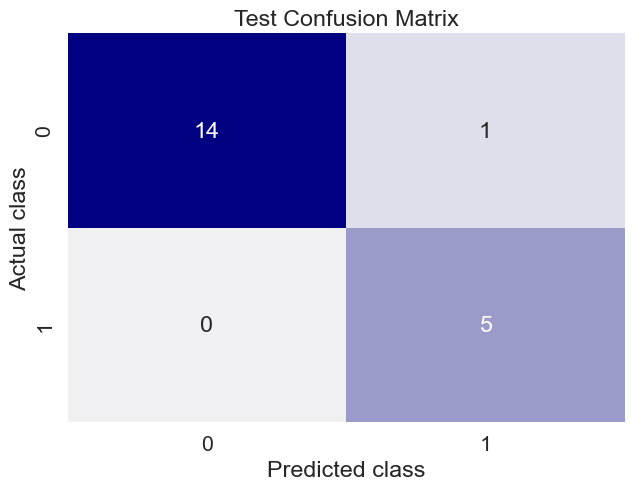

In [130]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# # Calculate precision
precision = precision_score(y_test, y_pred_binary)

# # Calculate F1 score
f1 = f1_score(y_test, y_pred_binary)


recall = recall_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall {recall:.2f}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, cmap=blue_palette, cbar=False, fmt='g') # font size
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test.png')
plt.show()

Epoch 1/500
3/3 [==============================] - 1s 96ms/step - loss: 0.6968 - accuracy: 0.3889 - val_loss: 0.6644 - val_accuracy: 0.7500
Epoch 2/500
3/3 [==============================] - 0s 16ms/step - loss: 0.6797 - accuracy: 0.5278 - val_loss: 0.6279 - val_accuracy: 0.7500
Epoch 3/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6663 - accuracy: 0.5278 - val_loss: 0.5995 - val_accuracy: 0.7500
Epoch 4/500
3/3 [==============================] - 0s 26ms/step - loss: 0.6561 - accuracy: 0.5278 - val_loss: 0.5781 - val_accuracy: 0.7500
Epoch 5/500
3/3 [==============================] - 0s 21ms/step - loss: 0.6461 - accuracy: 0.5278 - val_loss: 0.5637 - val_accuracy: 0.7500
Epoch 6/500
3/3 [==============================] - 0s 20ms/step - loss: 0.6401 - accuracy: 0.5278 - val_loss: 0.5487 - val_accuracy: 0.7500
Epoch 7/500
3/3 [==============================] - 0s 21ms/step - loss: 0.6329 - accuracy: 0.5417 - val_loss: 0.5383 - val_accuracy: 0.7500
Epoch 8/500
3/3 [===

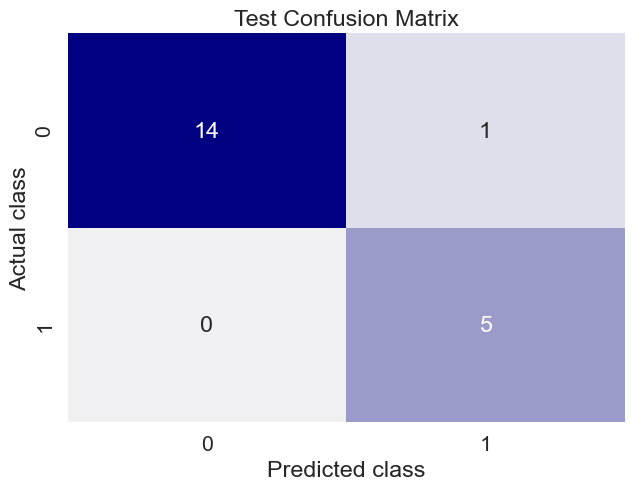

In [132]:

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix,recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load or generate your dataset
# X: Features, y: Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.1)

# Predict using the trained model
y_pred = (model.predict(X_test) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall {recall:.2f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, cmap=blue_palette, cbar=False, fmt='g') # font size
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test.png')
plt.show()